In [1]:
from datasets import load_dataset

dataset = load_dataset("rungalileo/20_Newsgroups_Fixed")

/home/students/s289159/.conda/envs/airbnb-XAI-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset csv (/home/students/s289159/.cache/huggingface/datasets/rungalileo___csv/rungalileo--20_Newsgroups_Fixed-edf414ecc72dd622/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
100%|██████████| 2/2 [00:00<00:00,  7.96it/s]


In [2]:
import pandas as pd

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label'],
        num_rows: 11314
    })
    test: Dataset({
        features: ['id', 'text', 'label'],
        num_rows: 7532
    })
})

In [4]:
dataset["test"][2]

{'id': 2, 'text': '\nIn a word, yes.\n', 'label': 'None'}

In [5]:
print(len(dataset["train"]))

11314


In [6]:
# remove all the samples belonging to the class "None"
print(f'Number of training examples before filtering {len(dataset["train"])}')
dataset["train"] = dataset["train"].filter(lambda example: example["label"] != "None")
print(f'Number of training examples after filtering {len(dataset["train"])}')

print(f'Number of test examples before filtering {len(dataset["test"])}')
dataset["test"] = dataset["test"].filter(lambda example: example["label"] != "None")
print(f'Number of test examples after filtering {len(dataset["test"])}')

Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/rungalileo___csv/rungalileo--20_Newsgroups_Fixed-edf414ecc72dd622/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1/cache-9840a671998db206.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/rungalileo___csv/rungalileo--20_Newsgroups_Fixed-edf414ecc72dd622/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1/cache-c5525844ffec7b74.arrow


Number of training examples before filtering 11314
Number of training examples after filtering 10664
Number of test examples before filtering 7532
Number of test examples after filtering 7019


In [7]:
set(list(dataset["train"]["label"]))

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [8]:
# Class mapping

# 0 -> comp.graphics (0)
# 0 -> comp.os.ms-windows.misc (1)
# 0 -> comp.sys.ibm.pc.hardware (2)
# 0 -> comp.sys.mac.hardware (3)
# 0 -> comp.windows.x (4)

# 1 -> misc.forsale (5)

# 2 -> talk.politics.misc (6)
# 2 -> talk.politics.guns (7)
# 2 -> talk.politics.mideast (8)

# 3 -> talk.religion.misc (9)
# 3 -> alt.atheism (10)
# 3 -> soc.religion.christian (11)

# 4 -> sci.crypt (12)
# 4 -> sci.electronics (13)
# 4 -> sci.med (14)
# 4 -> sci.space (15)

# 5 -> rec.autos # Drift (16)
# 5 -> rec.motorcycles # Drift (17)
# 5 -> rec.sport.baseball # Drift (18)
# 5 -> rec.sport.hockey # Drift (19)

In [9]:
label2macroid = {
"comp.graphics": 0,
"comp.os.ms-windows.misc": 0,
"comp.sys.ibm.pc.hardware": 0,
"comp.sys.mac.hardware": 0,
"comp.windows.x": 0,
"misc.forsale": 1,
"talk.politics.misc": 2,
"talk.politics.guns": 2,
"talk.politics.mideast": 2,
"talk.religion.misc": 3,
"alt.atheism": 3,
"soc.religion.christian": 3,
"sci.crypt": 4,
"sci.electronics": 4,
"sci.med": 4,
"sci.space": 4,
"rec.autos": 6, # Drift
"rec.motorcycles": 6, # Drift
"rec.sport.baseball": 5, 
"rec.sport.hockey": 5        
}

In [10]:
macroid2macrolabel = ["Technology", "Sale-Ads", "Politics", "Religion", "Science", "Recreation-Sport", "Recreation-Motors"]

In [11]:
label2id = {
"comp.graphics": 0,
"comp.os.ms-windows.misc": 1,
"comp.sys.ibm.pc.hardware": 2,
"comp.sys.mac.hardware": 3,
"comp.windows.x": 4,
"misc.forsale": 5,
"talk.politics.misc": 6,
"talk.politics.guns": 7,
"talk.politics.mideast": 8,
"talk.religion.misc": 9,
"alt.atheism": 10,
"soc.religion.christian": 11,
"sci.crypt": 12,
"sci.electronics": 13,
"sci.med": 14,
"sci.space": 15,
"rec.autos": 16,
"rec.motorcycles": 17,
"rec.sport.baseball": 18,
"rec.sport.hockey": 19        
}

In [12]:
# Convert the dataset to a pandas DataFrame
df_train = dataset['train'].to_pandas()

df_test = dataset['test'].to_pandas()

In [13]:
df_train.head()

,id,text,label
0,0,I was wondering if anyone out there could enli...,rec.autos
1,1,A fair number of brave souls who upgraded thei...,comp.sys.mac.hardware
2,2,"well folks, my mac plus finally gave up the gh...",comp.sys.mac.hardware
3,3,\nDo you have Weitek's address/phone number? ...,comp.graphics
4,4,"From article <C5owCB.n3p@world.std.com>, by to...",sci.space


In [14]:
df_train["micro_label_name"] = df_train["label"]
df_train.drop(labels="label", axis=1, inplace=True)
df_train["micro_label_id"] = df_train["micro_label_name"].apply(lambda l: label2id[l])
df_train["macro_label_id"] = df_train["micro_label_name"].apply(lambda l: label2macroid[l])
df_train["macro_label_name"] = df_train["macro_label_id"].apply(lambda l: macroid2macrolabel[l])

In [15]:
df_test["micro_label_name"] = df_test["label"]
df_test.drop(labels="label", axis=1, inplace=True)
df_test["micro_label_id"] = df_test["micro_label_name"].apply(lambda l: label2id[l])
df_test["macro_label_id"] = df_test["micro_label_name"].apply(lambda l: label2macroid[l])
df_test["macro_label_name"] = df_test["macro_label_id"].apply(lambda l: macroid2macrolabel[l])

In [16]:
df_train.head()

,id,text,micro_label_name,micro_label_id,macro_label_id,macro_label_name
0,0,I was wondering if anyone out there could enli...,rec.autos,16,6,Recreation-Motors
1,1,A fair number of brave souls who upgraded thei...,comp.sys.mac.hardware,3,0,Technology
2,2,"well folks, my mac plus finally gave up the gh...",comp.sys.mac.hardware,3,0,Technology
3,3,\nDo you have Weitek's address/phone number? ...,comp.graphics,0,0,Technology
4,4,"From article <C5owCB.n3p@world.std.com>, by to...",sci.space,15,4,Science


In [17]:
df_test.head()

,id,text,micro_label_name,micro_label_id,macro_label_id,macro_label_name
0,0,I am a little confused on all of the models of...,rec.autos,16,6,Recreation-Motors
1,1,I'm not familiar at all with the format of the...,comp.windows.x,4,0,Technology
2,3,\nThey were attacking the Iraqis to drive them...,talk.politics.mideast,8,2,Politics
3,4,\nI've just spent two solid months arguing tha...,talk.religion.misc,9,3,Religion
4,5,"\nElisabeth, let's set the record straight for...",sci.med,14,4,Science


In [18]:
df_train_deg = df_train.loc[df_train.macro_label_id == 6].copy()
df_test_deg = df_test.loc[df_test.macro_label_id == 6].copy()

df_deg = pd.concat([df_train_deg, df_test_deg])

df_train = df_train.loc[df_train.macro_label_id != 6]
df_test = df_test.loc[df_test.macro_label_id != 6]


In [19]:
df_train.macro_label_id.value_counts()

0    2781
4    2267
2    1485
3    1370
5    1106
1     565
Name: macro_label_id, dtype: int64

In [20]:
df_test.macro_label_id.value_counts()

0    1844
4    1466
2     982
3     900
5     744
1     368
Name: macro_label_id, dtype: int64

<AxesSubplot:title={'center':'Target Dristribution'}, ylabel='Frequency'>

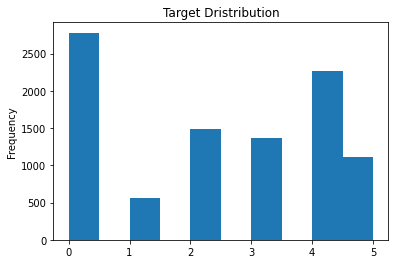

In [21]:
df_train.macro_label_id.plot(kind='hist', title='Target Dristribution')

<AxesSubplot:title={'center':'Target Dristribution'}, ylabel='Frequency'>

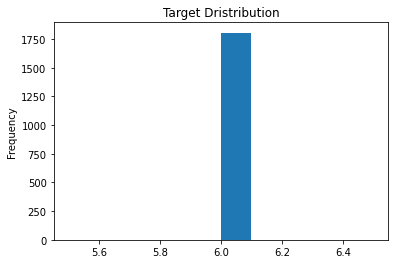

In [22]:
df_deg.macro_label_id.plot(kind='hist', title='Target Dristribution')

In [23]:
df_train['id'] = range(0, len(df_train))
df_deg['id'] = range(len(df_train),len(df_train)+len(df_deg) )
df_test['id'] = range(len(df_deg)+len(df_train),len(df_train)+len(df_deg)+len(df_test))

In [24]:
df_train.head()

,id,text,micro_label_name,micro_label_id,macro_label_id,macro_label_name
1,0,A fair number of brave souls who upgraded thei...,comp.sys.mac.hardware,3,0,Technology
2,1,"well folks, my mac plus finally gave up the gh...",comp.sys.mac.hardware,3,0,Technology
3,2,\nDo you have Weitek's address/phone number? ...,comp.graphics,0,0,Technology
4,3,"From article <C5owCB.n3p@world.std.com>, by to...",sci.space,15,4,Science
5,4,\n\n\n\n\nOf course. The term must be rigidly...,talk.politics.guns,7,2,Politics


In [25]:
df_new_unseen = df_test.copy()

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_test=0.4,
                                         random_state=None):


    if frac_train + frac_test != 1.0:
        raise ValueError('fractions %f, %f do not add up to 1.0' % \
                         (frac_train, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input # Contains all columns.
    y = df_input[[stratify_colname]] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and test dataframes.
    df_train, df_test, y_train, y_test = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=frac_test,
                                                          random_state=random_state)


    assert len(df_input) == len(df_train) + len(df_test)

    return df_train, df_test

In [27]:
df_train, df_test = split_stratified_into_train_val_test(df_train, stratify_colname='macro_label_id',
                                         frac_train=0.6, frac_test=0.4,
                                         random_state=42)

In [28]:
print(len(df_train))
print(len(df_test))
print(len(df_new_unseen))
print(len(df_deg))

5744
3830
6304
1805


In [29]:
df_train.macro_label_id.value_counts()

0    1668
4    1360
2     891
3     822
5     664
1     339
Name: macro_label_id, dtype: int64

In [30]:
df_test.macro_label_id.value_counts()

0    1113
4     907
2     594
3     548
5     442
1     226
Name: macro_label_id, dtype: int64

In [31]:
df_new_unseen.macro_label_id.value_counts()

0    1844
4    1466
2     982
3     900
5     744
1     368
Name: macro_label_id, dtype: int64

In [32]:
import re

def clean_text(text):
    text = re.sub("@\S+", " ", text) # Remove Mentions
    text = re.sub("https*\S+", " ", text) # Remove URL
    text = re.sub("#\S+", " ", text) # Remove Hastags
    text = re.sub('&lt;/?[a-z]+&gt;', '', text) # Remove special Charaters
    text = re.sub('#39', ' ', text) # Remove special Charaters
    text = re.sub('<.*?>', '', text) # Remove html
    text = re.sub(' +', ' ', text) # Merge multiple blank spaces
    text = re.sub('[^a-zA-Z0-9 \n\.]', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub("\n", " ", text) # Remove \n
    text = re.sub("\S*@\S*\s?", " ", text) # Remove mails
    text = re.sub("/", " ", text) # Remove /
    text = re.sub("-", "", text) # Remove /
    text = text.strip()
    #text = re.sub("*", "", text) # Remove *
    return text

def get_label_name(label_id):
    labels = ["Technology", "Sale-Ads", "Politics", "Religion", "Science",  "Recreation-Sport", "Recreation-motors"]
    return labels[label_id]

In [33]:
df_train_cleaned = df_train.copy()
df_deg_cleaned = df_deg.copy()
df_test_cleaned = df_test.copy()

df_train_cleaned["text"] = df_train_cleaned["text"].apply(clean_text)
df_deg_cleaned["text"] = df_deg_cleaned["text"].apply(clean_text)
df_test_cleaned["text" ]= df_test_cleaned["text"].apply(clean_text)

In [34]:
import numpy as np

df_train_cleaned['text'].replace('', np.nan, inplace=True)
df_deg_cleaned['text'].replace('', np.nan, inplace=True)
df_test_cleaned['text'].replace('', np.nan, inplace=True)

df_train_cleaned.dropna(subset=['text'], inplace=True)
df_deg_cleaned.dropna(subset=['text'], inplace=True)
df_test_cleaned.dropna(subset=['text'], inplace=True)

df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned.text.str.isspace()].index)
df_deg_cleaned = df_deg_cleaned.drop(df_deg_cleaned[df_deg_cleaned.text.str.isspace()].index)
df_test_cleaned = df_test_cleaned.drop(df_test_cleaned[df_test_cleaned.text.str.isspace()].index)

df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned.text == ""].index)
df_deg_cleaned = df_deg_cleaned.drop(df_deg_cleaned[df_deg_cleaned.text == ""].index)
df_test_cleaned = df_test_cleaned.drop(df_test_cleaned[df_test_cleaned.text == ""].index)

In [35]:
label_list = [0, 1, 2, 3, 4, 5, 6]
training_label_list = [0, 1, 2, 3, 4, 5]
drift_label_list = [6]

<AxesSubplot:>

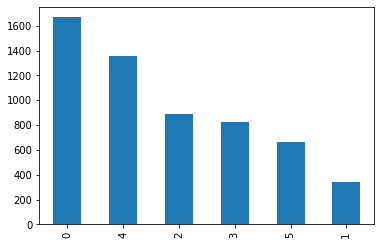

In [36]:
df_train['macro_label_id'].value_counts(sort=True).plot.bar()

In [37]:
df_train.shape

(5744, 6)

<AxesSubplot:>

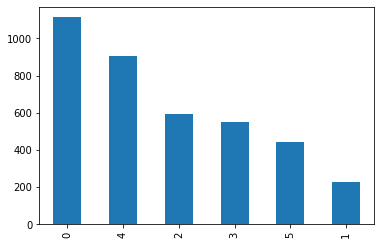

In [38]:
df_test['macro_label_id'].value_counts(sort=True).plot.bar()

<AxesSubplot:>

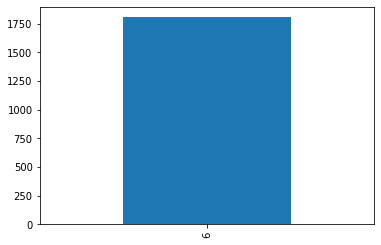

In [39]:
df_deg['macro_label_id'].value_counts(sort=True).plot.bar()

In [41]:
import os

base_dir = "use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors"

df_train_cleaned.to_csv(os.path.join(base_dir,"dataset","df_train_0-5.csv"))
df_test_cleaned.to_csv(os.path.join(base_dir,"dataset","df_test_0-5.csv"))
df_new_unseen.to_csv(os.path.join(base_dir,"dataset","df_new_unseen_0-5.csv"))
df_deg_cleaned.to_csv(os.path.join(base_dir,"dataset","df_drifted_6.csv"))

In [42]:
model_name = "bert-base-uncased"

In [43]:
import datasets
from datasets import Dataset, DatasetDict


train_dataset = Dataset.from_pandas(df_train_cleaned)
validation_dataset = Dataset.from_pandas(df_test_cleaned)


ds = DatasetDict()

ds['train'] = train_dataset.shuffle()
ds['validation'] = validation_dataset.shuffle()

In [44]:
ds['train']

Dataset({
    features: ['id', 'text', 'micro_label_name', 'micro_label_id', 'macro_label_id', 'macro_label_name', '__index_level_0__'],
    num_rows: 5744
})

In [45]:
columns_list = ["id", "micro_label_name", "micro_label_id", "macro_label_name", "__index_level_0__"]

ds['train'] = ds['train'].remove_columns(columns_list)
ds['validation'] = ds['validation'].remove_columns(columns_list)

ds['train'] = ds['train'].rename_column("macro_label_id", "label")
ds['validation'] = ds['validation'].rename_column("macro_label_id", "label")

In [46]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 5744
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 3829
    })
})

In [47]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=True)


In [48]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = ds.map(tokenize_function, batched=True)

In [49]:
tokenized_datasets["train"][0]["text"]

'I get it. One organization wants to abolish age of consent laws whereas in contrast the other wants to abolish age of consent laws. This makes it respectable to belong to one organization but not the other.'

In [50]:
label2id_train = {"Technology": 0,
                  "Sale-Ads": 1,
                  "Politics": 2,
                 "Religion": 3, 
                 "Science": 4,
                  "Recreation-Sport": 5}


In [51]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, 
                                                           num_labels=len(training_label_list),
                                                           label2id=label2id_train,
                                                           id2label={id: label for label, id in label2id_train.items()})

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [52]:
import sklearn

def compute_metrics(pred):
    labels = pred.label_ids
    print(pred)
    try:
        preds = pred.predictions.argmax(-1)
    except:
        preds = pred.predictions[0].argmax(-1)
    precision, recall, f1, _ = sklearn.metrics.precision_recall_fscore_support(
        labels, preds, average="macro", labels=list(set(labels))
    )
    print(sklearn.metrics.classification_report(labels, preds, digits=4))
    acc = sklearn.metrics.accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

In [53]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir=os.path.join(base_dir,"saved_model", "checkpoint"),
    learning_rate=2e-5,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="f1",
    load_best_model_at_end=True,
    greater_is_better=True,
)

In [54]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 5744
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3829
    })
})

In [55]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [56]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/home/students/s289159/.conda/envs/airbnb-XAI-env/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5744
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1077


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.384827,0.875947,0.870509,0.877316,0.865015
2,0.533300,0.393184,0.889788,0.886569,0.892181,0.882548
3,0.180600,0.427851,0.888744,0.886458,0.893317,0.880347


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 3829
  Batch size = 16


              precision    recall  f1-score   support

           0     0.8758    0.9451    0.9092      1112
           1     0.7991    0.8097    0.8044       226
           2     0.8437    0.8451    0.8444       594
           3     0.9160    0.8558    0.8849       548
           4     0.8439    0.8225    0.8331       907
           5     0.9853    0.9118    0.9471       442

    accuracy                         0.8759      3829
   macro avg     0.8773    0.8650    0.8705      3829
weighted avg     0.8771    0.8759    0.8758      3829



Saving model checkpoint to use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-359
Configuration saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-359/config.json
Model weights saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-359/pytorch_model.bin
tokenizer config file saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-359/tokenizer_config.json
Special tokens file saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-359/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluatio

              precision    recall  f1-score   support

           0     0.8813    0.9478    0.9133      1112
           1     0.8657    0.8274    0.8462       226
           2     0.8354    0.8889    0.8613       594
           3     0.9067    0.8686    0.8872       548
           4     0.9011    0.8236    0.8606       907
           5     0.9629    0.9389    0.9507       442

    accuracy                         0.8898      3829
   macro avg     0.8922    0.8825    0.8866      3829
weighted avg     0.8910    0.8898    0.8894      3829



Saving model checkpoint to use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-718
Configuration saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-718/config.json
Model weights saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-718/pytorch_model.bin
tokenizer config file saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-718/tokenizer_config.json
Special tokens file saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-718/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluatio

              precision    recall  f1-score   support

           0     0.8937    0.9379    0.9153      1112
           1     0.8815    0.8230    0.8513       226
           2     0.8512    0.8670    0.8590       594
           3     0.8937    0.8741    0.8838       548
           4     0.8657    0.8456    0.8555       907
           5     0.9741    0.9344    0.9538       442

    accuracy                         0.8887      3829
   macro avg     0.8933    0.8803    0.8865      3829
weighted avg     0.8890    0.8887    0.8886      3829



Saving model checkpoint to use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-1077
Configuration saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-1077/config.json
Model weights saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-1077/pytorch_model.bin
tokenizer config file saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-1077/tokenizer_config.json
Special tokens file saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-1077/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/checkpoint/checkpoint-718 (score: 0.8865686856674504).


TrainOutput(global_step=1077, training_loss=0.34126332388393504, metrics={'train_runtime': 696.0852, 'train_samples_per_second': 24.756, 'train_steps_per_second': 1.547, 'total_flos': 4534092539265024.0, 'train_loss': 0.34126332388393504, 'epoch': 3.0})

In [57]:
trainer.save_model(os.path.join(base_dir,"saved_model", "best_model"))

Saving model checkpoint to use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/best_model
Configuration saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/best_model/config.json
Model weights saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/best_model/pytorch_model.bin
tokenizer config file saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/best_model/tokenizer_config.json
Special tokens file saved in use_case/hf-bert-20-newsgroups-subclass-drift-recreation-motors/saved_model/best_model/special_tokens_map.json


In [58]:
print(
    "\n ----------------- EVALUATION BEST MODEL ON VALIDATION SET ----------------- \n"
)
print(trainer.evaluate())

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 3829
  Batch size = 16



 ----------------- EVALUATION BEST MODEL ON VALIDATION SET ----------------- 



              precision    recall  f1-score   support

           0     0.8813    0.9478    0.9133      1112
           1     0.8657    0.8274    0.8462       226
           2     0.8354    0.8889    0.8613       594
           3     0.9067    0.8686    0.8872       548
           4     0.9011    0.8236    0.8606       907
           5     0.9629    0.9389    0.9507       442

    accuracy                         0.8898      3829
   macro avg     0.8922    0.8825    0.8866      3829
weighted avg     0.8910    0.8898    0.8894      3829

{'eval_loss': 0.39318400621414185, 'eval_accuracy': 0.8897884565160616, 'eval_f1': 0.8865686856674504, 'eval_precision': 0.8921806706517312, 'eval_recall': 0.8825476127458837, 'eval_runtime': 42.0006, 'eval_samples_per_second': 91.165, 'eval_steps_per_second': 5.714, 'epoch': 3.0}
